# Random Forest Classifier in Python

In this notebook you will find the steps to solve a Random Forest classification problem in python.

### Loading packages

In [77]:
%matplotlib inline

import numpy as np
from numpy import genfromtxt, savetxt
import seaborn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import StratifiedKFold
from scipy import interp
import matplotlib.pyplot as plt

### Defining datasets

Define the test and training set we are going to use:

In [78]:
#create the training & test sets, skipping the header row with [1:]
dataset = genfromtxt(open('Data/train.csv','r'), delimiter=',', dtype='f8')[1:]    
target = [x[0] for x in dataset]
train = [x[1:] for x in dataset]
test = genfromtxt(open('Data/test.csv','r'), delimiter=',', dtype='f8')[1:]
test = [x[1:] for x in test]

### Generating a toy model dataset

We are going to generate here a dataset to run a toy model:

In [79]:
#create and train the random forest
#multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf.fit(train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
savetxt('Data/classes_predicted.csv', rf.predict(test), delimiter=',', fmt='%f')
savetxt('Data/probabil_predicted.csv', rf.predict_proba(test), delimiter=',', fmt='%f')

In [90]:
l = ['strand', 'bidirectional', 'stem_len', 'loop_len', 'spacer_len','energy', 'mismatched_b', 'GC', 'Ts', 'ptsc1', 'ptsc2', 'distbefdistaft']

for i in range(0, 13):
    print(l[i]+' = '+ str(rf.feature_importances_[i]))
    
print(rf.estimators)

# std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)

strand = 0.000202746473332
bidirectional = 0.0043200151188
stem_len = 0.0539623399955
loop_len = 0.00288564591212
spacer_len = 0.00784076734389
energy = 0.0825752329457
mismatched_b = 0.00605723052186
GC = 0.0204219215849
Ts = 0.314617208537
ptsc1 = 0.236744710514
ptsc2 = 0.177362091247
distbefdistaft = 0.087815115367


IndexError: list index out of range

In [ ]:
### Plotting feature importance

Feature ranking:
1. feature 0 (0.250402)
2. feature 1 (0.231094)
3. feature 2 (0.148057)
4. feature 3 (0.055632)
5. feature 5 (0.054583)
6. feature 8 (0.054573)
7. feature 6 (0.052606)
8. feature 7 (0.051109)
9. feature 9 (0.051010)
10. feature 4 (0.050934)


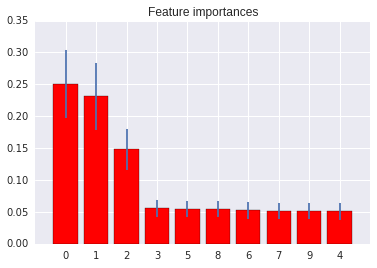

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()